<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Project2.do.txt  -->
<!-- dom:TITLE: Project 2 on Machine Learning, deadline November 13 (Midnight) -->

# Project 2 on Machine Learning, deadline November 13

## Classification and Regression, from linear and logistic regression to neural networks

The main aim of this project is to study both classification and
regression problems by developing our own feed-forward neural network
(FFNN) code. We can reuse the regression algorithms studied in project
1. We will also include logistic regression for classification
problems and write our own FFNN code for studying both regression and
classification problems.  The codes developed in project 1, including
bootstrap **and/or** cross-validation as well as the computation of the
mean-squared error and/or the $R2$ or the accuracy score
(classification problems) functions can also be utilized in the
present analysis.

The data sets that we propose here are (the default sets)

* Regression (fitting a continuous function). In this part you will need to bring back your results from project 1 and compare these with what you get from your Neural Network code to be developed here. The data sets could be

a. A simple one-dimensional function or the Franke function or the terrain data from project 1, or data sets your propose. It could be a simpler function than the Franke function. We recommend testing a simpler function (see below). But if you wish to try more complex function, feel free to do so.

* Classification. Here you will also need to develop a Logistic regression code that you will use to compare with the Neural Network code. The data set we propose are the so-called [Wisconsin Breat Cancer Data](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) data set of images representing various features of tumors. These are discussed intensively in the lecture notes, see for example the slides from [week 41](https://compphysics.github.io/MachineLearning/doc/pub/week41/html/week41.html). A longer explanation with links to the scientific literature can be found at the [Machine Learning repository of the University of California at Irvine](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29). Feel free to consult this site and the pertinent  literature.

You can find more information about this at the [Scikit-Learn site](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) or at the [University of California at Irvine](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)). 

However, if you would like to study other data sets, feel free to
propose other sets. What we list here are mere suggestions from our
side. If you opt for another data set, consider using a set which has
been studied in the scientific literature. This makes it easier for
you to compare and analyze your results. Comparing with existing
results from the scientific literature is also an essential element of
the scientific discussion.  The University of California at Irvine
with its Machine Learning repository at
<https://archive.ics.uci.edu/ml/index.php> is an excellent site to
look up for examples and
inspiration. [Kaggle.com](https://www.kaggle.com/) is an equally
interesting site. Feel free to explore these sites.

We will start with a regression problem and we will reuse our codes from project 1 starting with writing our own Stochastic Gradient Descent (SGD) code.

### Part a): Write your own Stochastic Gradient Descent  code, first step

In order to get started, we will now replace in our standard ordinary
least squares (OLS) and Ridge regression codes (from project 1) the
matrix inversion algorithm with our own gradient descent (GD) and SGD
codes.  You can use the Franke function or the terrain data from
project 1. **However, we recommend using a simpler function like**
$f(x)=a_0+a_1x+a_2x^2$ or higher-order one-dimensional polynomials.
You can obviously test your final codes against for example the Franke
function.

You should include in your analysis of the GD and SGD codes the following elements
1. A plain gradient descent with a fixed learning rate (you will need to tune it) using the analytical expression for the gradient.

2. Add momentum to the plain GD code and compare convergence with a fixed learning rate (you may need to tune the learning rate). Keep using the analytical expression for the gradient.

3. Repeat these steps for stochastic gradient descent with mini batches and a given number of epochs. Use a tunable learning rate as discussed in the lectures from weeks 39 and 40. Discuss the results as functions of the various parameters (size of batches, number of epochs etc). Use the analytical gradient.

4. Implement the Adagrad method in order to tune the learning rate. Do this with and without momentum for plain gradient descent and SGD.

5. Add RMSprop and Adam to your library of methods for tuning the learning rate.

The lecture notes from [weeks 39 and 40contain more
details](https://compphysics.github.io/MachineLearning/doc/pub/week39/html/week39.html) and code examples. Feel free to use these examples.
1. Replace thereafter your analytical gradient with either **Autograd** or **JAX**

In summary, you should 
perform an analysis of the results for OLS and Ridge regression as
function of the chosen learning rates, the number of mini-batches and
epochs as well as algorithm for scaling the learning rate. You can
also compare your own results with those that can be obtained using
for example **Scikit-Learn**'s various SGD options.  Discuss your
results. For Ridge regression you need now to study the results as functions of  the hyper-parameter $\lambda$ and 
the learning rate $\eta$.  Discuss your results.

You will need your SGD code for the setup of the Neural Network and
Logistic Regression codes. You will find the Python [Seaborn
package](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
useful when plotting the results as function of the learning rate
$\eta$ and the hyper-parameter $\lambda$ when you use Ridge
regression.

We recommend reading chapter 8 on optimization from the textbook of [Goodfellow, Bengio and Courville](https://www.deeplearningbook.org/). This chapter contains many useful insights and discussions on the optimization part of machine learning.

In [80]:
# Imports, data generation, functions, etc.

#Imports
%matplotlib inline
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
import autograd.numpy as np
from autograd import grad
import seaborn as sns

#Generate data set
n = 100
x = 2*np.random.rand(n,1)
y = 4 + 3*x + 2*x**2 # The function: f(x)=a_0+a_1x+a_2x^2
X = np.c_[np.ones((n,1)), x, x**2]
XT_X = X.T @ X

#Own inversion
theta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("Inversion: \n", theta_linreg)

#Hessian
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)

# Define functions
def CostOLS(beta):
    return (1.0/n)*np.sum((y-X @ beta)**2)
def learning_schedule(t):
    return t0/(t+t1)

# Define eta and theta
theta = np.random.randn(3,1)
theta_gd = theta
theta_gd_momentum = theta
theta_sgd = theta
theta_sgd_momentum = theta 
theta_gd_autograd = theta
theta_gd_autograd_momentum = theta
theta_sgd_autograd = theta
theta_sgd_autograd_momentum = theta
theta_RMS = theta
theta_ADAM = theta

eta = 1.0/np.max(EigValues)
eta_gd = eta
eta_gd_momentum = eta
eta_gd_autograd = eta
eta_autograd_momentum = eta

Niterations = 30

Inversion: 
 [[4.]
 [3.]
 [2.]]


In [81]:
# 1) Own GD: plain GD with fixed learning rate using the analytical expression for the gradient

for iter in range(Niterations):
    gradients = 2.0/n*X.T @ ((X @ theta_gd)-y)
    theta_gd -= eta_gd*gradients

print("GD: \n", theta_gd)

GD: 
 [[3.94159569]
 [2.55710364]
 [2.32863106]]


>0 f([0.26043581]) = 4.91696
>1 f([-0.14373852]) = 3.61011
>2 f([-0.38624311]) = 3.13964
>3 f([-0.53174587]) = 2.97027
>4 f([-0.61904752]) = 2.90930
>5 f([-0.67142851]) = 2.88735
>6 f([-0.70285711]) = 2.87944
>7 f([-0.72171426]) = 2.87660
>8 f([-0.73302856]) = 2.87558
>9 f([-0.73981714]) = 2.87521
>10 f([-0.74389028]) = 2.87507
>11 f([-0.74633417]) = 2.87503
>12 f([-0.7478005]) = 2.87501
>13 f([-0.7486803]) = 2.87500
>14 f([-0.74920818]) = 2.87500
>15 f([-0.74952491]) = 2.87500
>16 f([-0.74971494]) = 2.87500
>17 f([-0.74982897]) = 2.87500
>18 f([-0.74989738]) = 2.87500
>19 f([-0.74993843]) = 2.87500
>20 f([-0.74996306]) = 2.87500
>21 f([-0.74997783]) = 2.87500
>22 f([-0.7499867]) = 2.87500
>23 f([-0.74999202]) = 2.87500
>24 f([-0.74999521]) = 2.87500
>25 f([-0.74999713]) = 2.87500
>26 f([-0.74999828]) = 2.87500
>27 f([-0.74999897]) = 2.87500
>28 f([-0.74999938]) = 2.87500
>29 f([-0.74999963]) = 2.87500


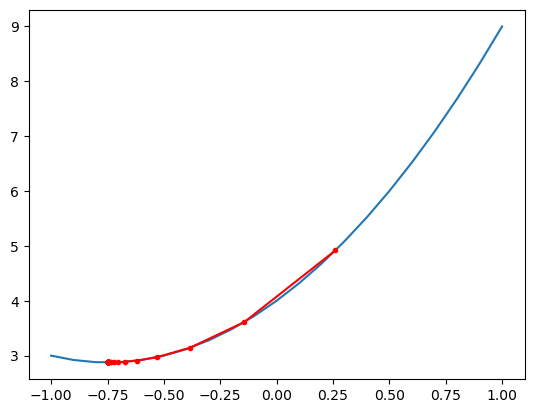

In [82]:
# 2) Add momentum to the plain GD code, keep using the analytical expression for the gradient
from numpy import asarray, arange
from numpy.random import rand, seed
 
def objective(x):
    return 4 + 3*x + 2*x**2
def derivative(x):
    return 3 + 4*x
 
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
    solutions, scores = list(), list()
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    for i in range(n_iter):
        gradient = derivative(solution)
        solution = solution - step_size * gradient
        solution_eval = objective(solution)
        solutions.append(solution)
        scores.append(solution_eval)
        print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [solutions, scores]
 
seed(4)
bounds = asarray([[-1.0, 1.0]])
n_iter = 30
step_size = 0.1
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
results = objective(inputs)
plt.plot(inputs, results)
plt.plot(solutions, scores, '.-', color='red')
plt.show()

In [83]:
# 3) Repeat for SGD with mini batches and a given number of epochs. Use tunable learning rate.
# Discuss the results as functions of the various parameters (size of batches, number of epochs etc)
# Use the analytical gradient

n = 50
M = 5
m = int(n/M)
t0, t1 = 5, 50

for epoch in range(n):
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (2.0/M)* xi.T @ ((xi @ theta_sgd)-yi)
        eta_sgd = learning_schedule(epoch*m+i)
        theta_sgd = theta_sgd - eta_sgd*gradients

print("SGD: \n", theta_sgd)

SGD: 
 [[4.12269524]
 [2.68781018]
 [2.14914765]]


In [84]:
# 4) Use Adagrad method to tune the learning rate, with and without momentum for plain GD and SGD.

# GD fixed learning
training_gradient = grad(CostOLS)
for iter in range(Niterations):
    gradients = training_gradient(theta_gd_autograd)
    theta_gd_autograd -= eta_gd_autograd*gradients
print("GD Autograd: \n", theta_gd_autograd)

# GD with momentum
change = 0.01
delta_momentum = 0.2
for iter in range(Niterations):
    gradients = training_gradient(theta_gd_autograd_momentum)
    new_change = eta_autograd_momentum*gradients+delta_momentum*change
    theta_gd_autograd_momentum -= new_change
    change = new_change
print("GD Autograd wth momentum: \n", theta_gd_autograd_momentum)

#SGD
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

def sgd(n,M,t0,t1,theta_sgd_autograd):
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = M*np.random.randint(m)
            xi = X[random_index:random_index+M]
            yi = y[random_index:random_index+M]
            gradients = (2.0/M)* xi.T @ ((xi @ theta_sgd_autograd)-yi)
            eta_sgd_autograd = learning_schedule(epoch*m+i)
            theta_sgd_autograd = theta_sgd_autograd - eta_sgd_autograd*gradients
    print("SGD Autograd: \n",  theta_sgd_autograd)

n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
t0, t1 = 5, 50

sgd(n,M,t0,t1,theta_sgd_autograd)

# SGD with momentum
eta_SGD_autograd_momentum = 1.0/np.max(EigValues)
Niterations = 100
training_gradient = grad(CostOLS,2)
change = 0.1
delta_momentum = 0.3

for epoch in range(n_epochs):
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta_sgd_autograd_momentum)
        eta_SGD_autograd_momentum = learning_schedule(epoch*m+i)
        new_change = eta_SGD_autograd_momentum*gradients+delta_momentum*change
        theta_sgd_autograd_momentum -= new_change
        change = new_change

print("SGD Autograd with momentum: \n", theta_sgd_autograd_momentum)

GD Autograd: 
 [[4.12319724]
 [2.6579026 ]
 [2.16681524]]
GD Autograd wth momentum: 
 [[4.09507445]
 [2.73863111]
 [2.12695911]]
SGD Autograd: 
 [[4.07568712]
 [2.80771797]
 [2.09167758]]
SGD Autograd with momentum: 
 [[4.06569431]
 [2.83293089]
 [2.08113767]]


In [85]:
# 5) Add RMSprop and Adam to your library of methods for tuning the learning rate.

# RMSprop
training_gradient = grad(CostOLS,2)
n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches

eta = 0.01
rho = 0.99
delta  = 1e-8

for epoch in range(n_epochs):
    Giter = 0.0
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta_RMS)
        Giter = (rho*Giter+(1-rho)*gradients*gradients)
        update = gradients*eta/(delta+np.sqrt(Giter))
        theta_RMS -= update
print("RMSprop: \n", theta_RMS)

# ADAM
eta = 0.01
beta1 = 0.9
beta2 = 0.999
delta  = 1e-7
iter = 0
for epoch in range(n_epochs):
    first_moment = 0.0
    second_moment = 0.0
    iter += 1
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta_ADAM)
        first_moment = beta1*first_moment + (1-beta1)*gradients
        second_moment = beta2*second_moment+(1-beta2)*gradients*gradients
        first_term = first_moment/(1.0-beta1**iter)
        second_term = second_moment/(1.0-beta2**iter)
        update = eta*first_term/(np.sqrt(second_term)+delta)
        theta_ADAM -= update
print("ADAM: \n", theta_ADAM)

RMSprop: 
 [[3.99601583]
 [2.96160042]
 [2.01999541]]
ADAM: 
 [[4.00473522]
 [3.00621328]
 [2.00343663]]


### Part b): Writing your own Neural Network code

Your aim now, and this is the central part of this project, is to
write your own Feed Forward Neural Network  code implementing the back
propagation algorithm discussed in the lecture slides from [week 40](https://compphysics.github.io/MachineLearning/doc/pub/week41/html/week40.html) and
[week 41](https://compphysics.github.io/MachineLearning/doc/pub/week41/html/week41.html).

We will focus on a regression problem first and study either the simple second-order polynomial from part a) or the 
Franke function or terrain data (or both or other data sets) from
project 1.

Discuss again your choice of cost function.

Write an FFNN code for regression with a flexible number of hidden
layers and nodes using the Sigmoid function as activation function for
the hidden layers. Initialize the weights using a normal
distribution. How would you initialize the biases? And which
activation function would you select for the final output layer?

Train your network and compare the results with those from your OLS and Ridge Regression codes from project 1 if you use the Franke function or the terrain data.
You should test your results against a similar code using **Scikit-Learn** (see the examples in the above lecture notes from week 41) or **tensorflow/keras**. 

Comment your results and give a critical discussion of the results
obtained with the Linear  Regression code and your own Neural Network
code.  
Make an analysis of the regularization parameters and the learning rates employed to find the optimal MSE and $R2$ scores.

A useful reference on the back progagation algorithm is [Nielsen's
book](http://neuralnetworksanddeeplearning.com/). It is an excellent
read.

### Part c): Testing different activation functions

You should now also test different activation functions for the hidden layers. Try out the Sigmoid, the RELU and the Leaky RELU functions and discuss your results. You may also study the way you initialize your weights and biases.

### Part d): Classification  analysis using neural networks

With a well-written code it should now be easy to change the
activation function for the output layer.

Here we will change the cost function for our neural network code
developed in parts b) and c) in order to perform a classification analysis. 

We will here study the Wisconsin Breast Cancer  data set. This is a typical binary classification problem with just one single output, either True or Fale, $0$ or $1$ etc.
You find more information about this at the [Scikit-Learn
site](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) or at the [University of California
at Irvine](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)). 

To measure the performance of our classification problem we use the
so-called *accuracy* score.  The accuracy is as you would expect just
the number of correctly guessed targets $t_i$ divided by the total
number of targets, that is

$$
\text{Accuracy} = \frac{\sum_{i=1}^n I(t_i = y_i)}{n} ,
$$

where $I$ is the indicator function, $1$ if $t_i = y_i$ and $0$
otherwise if we have a binary classification problem. Here $t_i$
represents the target and $y_i$ the outputs of your FFNN code and $n$ is simply the number of targets $t_i$.

Discuss your results and give a critical analysis of the various parameters, including hyper-parameters like the learning rates and the regularization parameter $\lambda$ (as you did in Ridge Regression), various activation functions, number of hidden layers and nodes and activation functions.  

As stated in the introduction, it can also be useful to study other
datasets. 

Again, we strongly recommend that you compare your own neural Network
code for classification and pertinent results against a similar code using **Scikit-Learn**  or **tensorflow/keras** or **pytorch**.

### Part e): Write your Logistic Regression code, final step

Finally, we want to compare the FFNN code we have developed with
Logistic regression, that is we wish to compare our neural network
classification results with the results we can obtain with another
method.

Define your cost function and the design matrix before you start writing your code.
Write thereafter a Logistic regression code using your SGD algorithm. You can also use standard gradient descent in this case, with a learning rate as hyper-parameter.
Study the results as functions of the chosen learning rates.
Add also an $l_2$ regularization parameter $\lambda$. Compare your results with those from your FFNN code as well as those obtained using **Scikit-Learn**'s logistic regression functionality.

The weblink  here <https://medium.com/ai-in-plain-english/comparison-between-logistic-regression-and-neural-networks-in-classifying-digits-dc5e85cd93c3>compares logistic regression and FFNN using the so-called MNIST data set. You may find several useful hints and ideas from this article.

### Part f) Critical evaluation of the various algorithms

After all these glorious calculations, you should now summarize the
various algorithms and come with a critical evaluation of their pros
and cons. Which algorithm works best for the regression case and which
is best for the classification case. These codes can also be part of
your final project 3, but now applied to other data sets.